# Laboratorio #2

In [37]:
# Se importan librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Problema 1

In [19]:
def binarizar_imagen(imagen, umbral):
    # Se obtiene las dimensiones de la imagen
    alto, ancho = imagen.shape
    # Se crea la imagen a binarizar
    imagen_binarizada = imagen.copy()
    # Se aplica la binarización para cada píxel
    for y in range(alto):
        for x in range(ancho):
            if imagen[y, x] < umbral:
                imagen_binarizada[y, x] = 0
            else:
                imagen_binarizada[y, x] = 255
    return imagen_binarizada

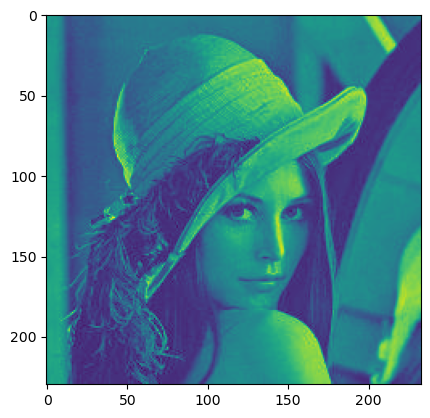

In [23]:
# Se carga la imagen
img = cv2.imread('imagenes\sample.JPG', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

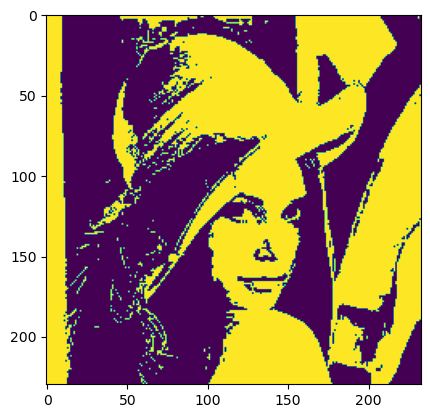

In [24]:
# Se define el umbral de binarización
umbral = 100
# Se aplica la binarización de la imagen
imagen_binarizada = binarizar_imagen(img, umbral)
plt.imshow(imagen_binarizada)

### Problema 2

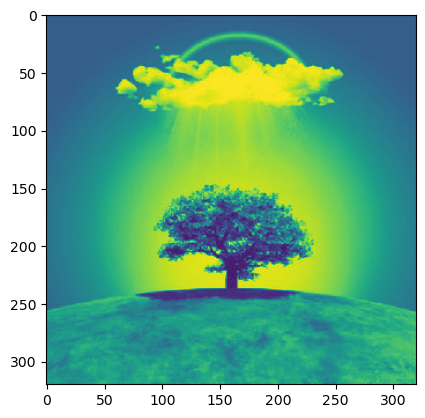

In [25]:
# Se carga la imagen adicional para realizar operaciones
img_p2 = cv2.imread('imagenes\sample2.JPG', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_p2)

In [30]:
def redimensionar_imagen(imagen, nueva_dimension):
    # Redimensiona la imagen a la nueva dimensión
    return cv2.resize(imagen, nueva_dimension, interpolation=cv2.INTER_AREA)


def operar_imagen(imagen1, imagen2, operacion, umbral=127):

    # Se verifica y ajusta el tamaño de las imágenes si es necesario
    if imagen1.shape != imagen2.shape:
        # Se redimensiona la imagen2 para que tenga el mismo tamaño que la imagen1
        nueva_dimension = (imagen1.shape[1], imagen1.shape[0])
        imagen2 = redimensionar_imagen(imagen2, nueva_dimension)

    # Se binariza ambas imágenes utilizando la función del problema 1
    binarizada1 = binarizar_imagen(imagen1, umbral)
    binarizada2 = binarizar_imagen(imagen2, umbral)

    # Se realiza la operación lógica seleccionada
    if operacion == 'suma':
        imagen_operada = cv2.add(binarizada1, binarizada2)
    elif operacion == 'resta':
        imagen_operada = cv2.subtract(binarizada1, binarizada2)
    elif operacion == 'and':
        imagen_operada = cv2.bitwise_and(binarizada1, binarizada2)
    elif operacion == 'or':
        imagen_operada = cv2.bitwise_or(binarizada1, binarizada2)
    elif operacion == 'xor':
        imagen_operada = cv2.bitwise_xor(binarizada1, binarizada2)
    else:
        raise ValueError("Operación no válida")

    return imagen_operada

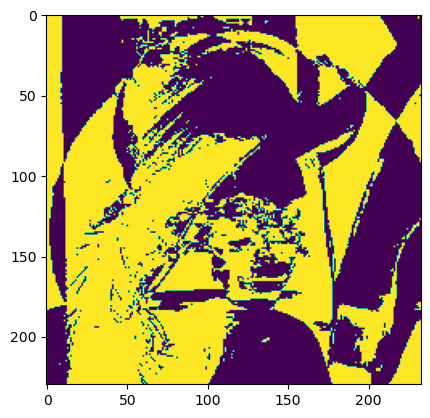

In [34]:
# Se define el umbral de binarización
umbral_p2 = 100
# Se define la operación
operacion = "xor"
# Se operan las imagenes
imagen_operada = operar_imagen(img, img_p2, operacion, umbral_p2)
plt.imshow(imagen_operada)

### Problema 3

In [42]:
def imagen_3d(imagen):
    # Se obtiene las dimensiones de la imagen en escala de grises
    alto, ancho = imagen.shape

    # Se crea una malla de coordenadas X e Y
    x, y = np.arange(ancho), np.arange(alto)
    X, Y = np.meshgrid(x, y)

    # Valores de intensidad de la imagen
    Z = imagen

    # Se crea una figura y un eje 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Se crea una superficie 3D para visualizar la imagen
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad Gris')
    plt.show()

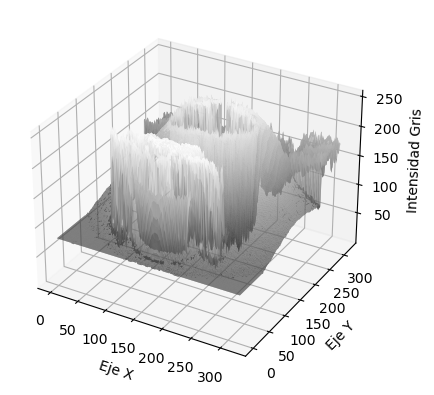

In [43]:
# Se muestra la imagen utilizada en el problema 2 en el espacio
imagen_3d(img_p2)

### Problema 4

In [65]:
def transformar_imagen(imagen, tipo_transformacion, parametros=None):

    # Transformación negativa
    if tipo_transformacion == 'negativa':
        imagen_transformada = 255 - imagen

    # Transformación lineal
    elif tipo_transformacion == 'lineal':
        if parametros is None or len(parametros) != 2:
            raise ValueError("La transformación lineal requiere una ganancia y un offset")
        ganancia, offset = parametros
        imagen_transformada = np.clip(ganancia * imagen + offset, 0, 255).astype(np.uint8)

    # Transformación logarítmica
    elif tipo_transformacion == 'logaritmica':
        if parametros is None or len(parametros) != 1:
            raise ValueError("La transformación logarítmica requiere el parámetro de ganancia.")
        ganancia = parametros[0]
        imagen_transformada = np.clip(ganancia * np.log(1 + imagen), 0, 255).astype(np.uint8)

    # Transformación exponencial
    elif tipo_transformacion == 'exponencial':
        if parametros is None or len(parametros) != 2:
            raise ValueError("La transformación exponencial requiere una ganancia y un gamma")
        ganancia, gamma = parametros
        imagen_transformada = np.clip(ganancia * np.power(imagen, gamma), 0, 255).astype(np.uint8)

    return imagen_transformada

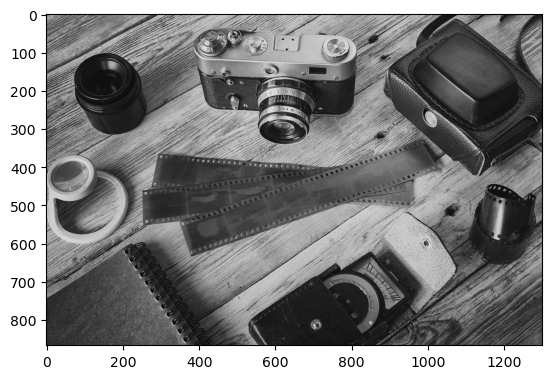

In [66]:
# Se carga una imagen para realizar las transformaciones
img_p4 = cv2.imread('imagenes\sample3.jpg')
plt.imshow(img_p4)

#### Transformación Negativa

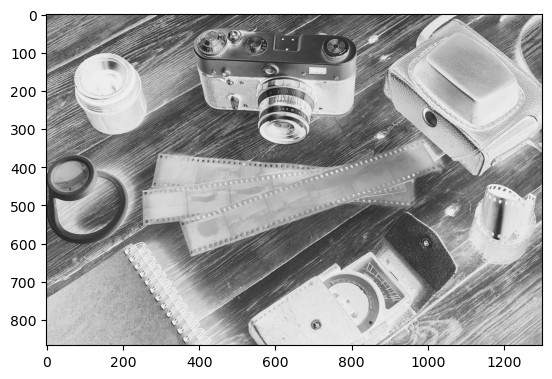

In [67]:
# Transformación negativa
imagen_negativa = transformar_imagen(img_p4, tipo_transformacion='negativa')
plt.imshow(imagen_negativa)

#### Transformación Lineal

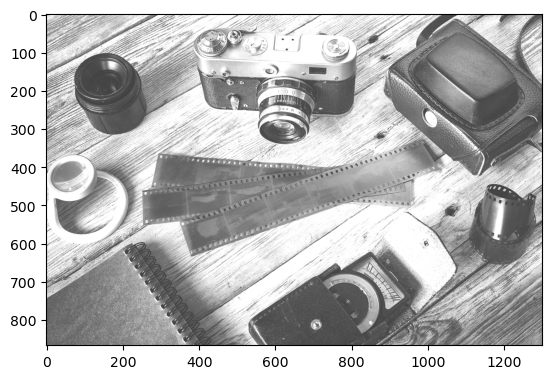

In [68]:
#Se definen los parámetros
ganancia = 1.2
offset = 50
imagen_lineal = transformar_imagen(img_p4, tipo_transformacion='lineal', parametros=[ganancia, offset])
plt.imshow(imagen_lineal)

#### Transformación Logarítmica

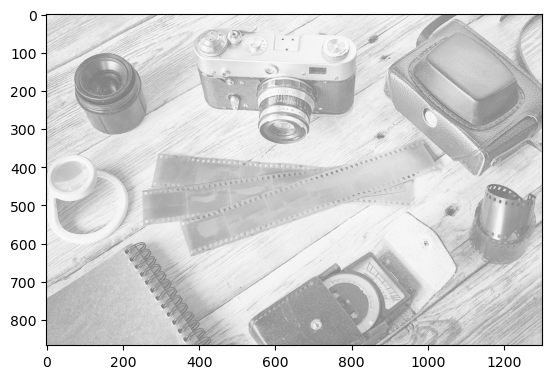

In [69]:
#Se definen los parámetros
ganancia_log = 255 / np.log(1 + np.max(img_p4))
imagen_logaritmica = transformar_imagen(img_p4, tipo_transformacion='logaritmica', parametros=[ganancia_log])
plt.imshow(imagen_logaritmica)

#### Tranformación Exponencial

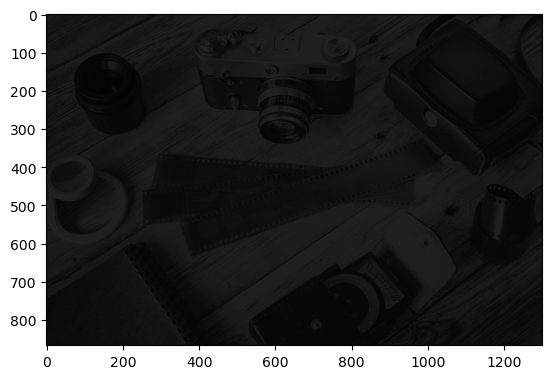

In [85]:
#Se definen los parámetros
ganancia_exp = 0.8
gamma_exp = 0.7
imagen_exponencial = transformar_imagen(img_p4, tipo_transformacion='exponencial', parametros=[ganancia_exp, gamma_exp])
plt.imshow(imagen_exponencial)

### Problema 5

In [100]:
def aplicar_filtro(imagen, tipo_filtro, **kwargs): # **kwargs para poder enviarle parámetros distintos
    if tipo_filtro == 'gaussiano':
        ksize = kwargs.get('ksize', (5, 5))
        sigmaX = kwargs.get('sigmaX', 0)
        return cv2.GaussianBlur(imagen, ksize, sigmaX)

    elif tipo_filtro == 'sobel_x':
        return cv2.Sobel(imagen, cv2.CV_64F, 1, 0)

    elif tipo_filtro == 'sobel_y':
        return cv2.Sobel(imagen, cv2.CV_64F, 0, 1)

    elif tipo_filtro == 'sharp':
        kernel = kwargs.get('kernel', np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]))
        return cv2.filter2D(imagen, -1, kernel)

    elif tipo_filtro == 'unsharp':
        imagen_suavizada = cv2.GaussianBlur(imagen, (5, 5), 10.0)
        alpha = kwargs.get('alpha', 1.5)
        beta = kwargs.get('beta', 0)
        return cv2.addWeighted(imagen, alpha, imagen_suavizada, beta, 0)

    elif tipo_filtro == 'laplaciano':
        return cv2.Laplacian(imagen, cv2.CV_64F)

    else:
        raise ValueError(f"Tipo de filtro no válido")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


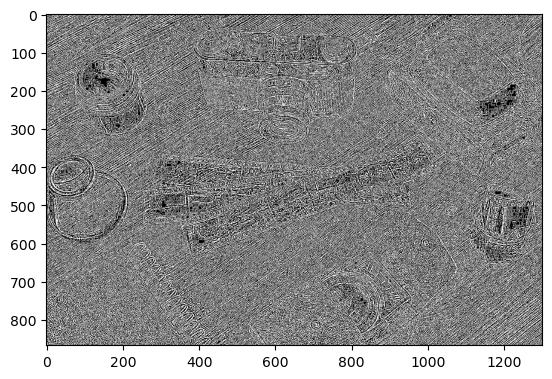

In [104]:
# Aplica el filtro de convolución
imagen_filtrada = aplicar_filtro(img_p4, tipo_filtro='laplaciano')
plt.imshow(imagen_filtrada)

### Problema 6

El kernel Laplaciano es una máscara que resalta los bordes y cambios abruptos de intensidad en una imagen, mientras que el algoritmo de Canny es un enfoque más completo y preciso para detectar bordes que incluye suavizado, cálculo de gradientes y umbralización. El enfoque de Canny es más elaborado y eficiente para eliminar el ruido y detectar bordes con mayor precisión, mientras que el kernel Laplaciano es una operación de filtrado simple que resalta los cambios de intensidad directamente.